In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
corpus

['in the town of athy one jeremy lanigan ',
 ' battered away til he hadnt a pound. ',
 'his father died and made him a man again ',
 ' left him a farm and ten acres of ground. ',
 'he gave a grand party for friends and relations ',
 'who didnt forget him when come to the wall, ',
 'and if youll but listen ill make your eyes glisten ',
 'of the rows and the ructions of lanigans ball. ',
 'myself to be sure got free invitation, ',
 'for all the nice girls and boys i might ask, ',
 'and just in a minute both friends and relations ',
 'were dancing round merry as bees round a cask. ',
 'judy odaly, that nice little milliner, ',
 'she tipped me a wink for to give her a call, ',
 'and i soon arrived with peggy mcgilligan ',
 'just in time for lanigans ball. ',
 'there were lashings of punch and wine for the ladies, ',
 'potatoes and cakes; there was bacon and tea, ',
 'there were the nolans, dolans, ogradys ',
 'courting the girls and dancing away. ',
 'songs they went round as plenty as wat

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [7]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [8]:
print(ys[6])
# all of the word become y

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [22]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(20))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5707 - accuracy: 0.0088
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5566 - accuracy: 0.0574
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5331 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 5.4596 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 5.3169 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 5.2033 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 5.1319 - accuracy: 0.0486
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0921 - accuracy: 0.0486
Epoch 9/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0612 - accuracy: 0.0486
Epoch 10/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0372 - accuracy: 0.0552
Epoch 11/

15/15 [==============================] - 0s 3ms/step - loss: 2.9699 - accuracy: 0.3797
Epoch 84/500
15/15 [==============================] - 0s 3ms/step - loss: 2.9464 - accuracy: 0.3753
Epoch 85/500
15/15 [==============================] - 0s 3ms/step - loss: 2.9400 - accuracy: 0.3731
Epoch 86/500
15/15 [==============================] - 0s 3ms/step - loss: 2.9051 - accuracy: 0.3929
Epoch 87/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8825 - accuracy: 0.3996
Epoch 88/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8620 - accuracy: 0.4018
Epoch 89/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8396 - accuracy: 0.4062
Epoch 90/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8172 - accuracy: 0.4172
Epoch 91/500
15/15 [==============================] - 0s 3ms/step - loss: 2.7970 - accuracy: 0.4260
Epoch 92/500
15/15 [==============================] - 0s 3ms/step - loss: 2.7762 - accuracy: 0.4327
Epoch 93/500


15/15 [==============================] - 0s 3ms/step - loss: 1.6496 - accuracy: 0.7263
Epoch 165/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6345 - accuracy: 0.7196
Epoch 166/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6209 - accuracy: 0.7395
Epoch 167/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6120 - accuracy: 0.7307
Epoch 168/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6001 - accuracy: 0.7417
Epoch 169/500
15/15 [==============================] - 0s 3ms/step - loss: 1.5876 - accuracy: 0.7439
Epoch 170/500
15/15 [==============================] - 0s 3ms/step - loss: 1.5731 - accuracy: 0.7461
Epoch 171/500
15/15 [==============================] - 0s 3ms/step - loss: 1.5615 - accuracy: 0.7550
Epoch 172/500
15/15 [==============================] - 0s 3ms/step - loss: 1.5534 - accuracy: 0.7550
Epoch 173/500
15/15 [==============================] - 0s 3ms/step - loss: 1.5402 - accuracy: 0.7506
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.9459 - accuracy: 0.8587
Epoch 246/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9399 - accuracy: 0.8653
Epoch 247/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9402 - accuracy: 0.8631
Epoch 248/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9325 - accuracy: 0.8631
Epoch 249/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9212 - accuracy: 0.8675
Epoch 250/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9147 - accuracy: 0.8653
Epoch 251/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9089 - accuracy: 0.8698
Epoch 252/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9052 - accuracy: 0.8631
Epoch 253/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.8653
Epoch 254/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.8653
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.8985
Epoch 327/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.9007
Epoch 328/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.9073
Epoch 329/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.9051
Epoch 330/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.9029
Epoch 331/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.9007
Epoch 332/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.9051
Epoch 333/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.9095
Epoch 334/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.9095
Epoch 335/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.9051
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.9338
Epoch 408/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.9338
Epoch 409/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.9360
Epoch 410/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.9360
Epoch 411/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.9338
Epoch 412/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.9338
Epoch 413/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.9338
Epoch 414/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.9316
Epoch 415/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.9294
Epoch 416/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.9294
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.9426
Epoch 489/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2873 - accuracy: 0.9448
Epoch 490/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.9426
Epoch 491/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.9404
Epoch 492/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2811 - accuracy: 0.9448
Epoch 493/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.9448
Epoch 494/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.9426
Epoch 495/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2785 - accuracy: 0.9426
Epoch 496/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9426
Epoch 497/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.9404
Epoc

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

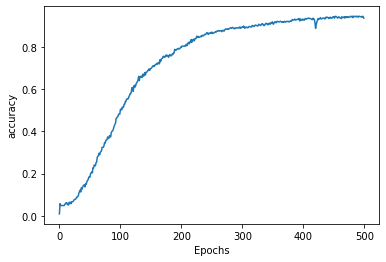

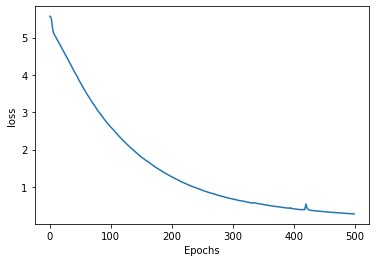

In [24]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [25]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

# as far as go, the probability goes down

Laurence went to dublin lanigans ball ball ball as a jig hearty minute both and pipes through murther hoops hoops murther murther murther hoops rose table rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose rose


### Reason of repeating words:

LSTM only carrying context forward
-> Adding Bidirectional

In [18]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5658 - accuracy: 0.0309
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.4747 - accuracy: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 5.2303 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1085 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0687 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0258 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9559 - accuracy: 0.0309
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 4.8913 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 4.8115 - accuracy: 0.0530
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.7419 - accuracy: 0.0574
Epoch 11/

15/15 [==============================] - 0s 6ms/step - loss: 2.5584 - accuracy: 0.3355
Epoch 84/500
15/15 [==============================] - 0s 7ms/step - loss: 2.5137 - accuracy: 0.3510
Epoch 85/500
15/15 [==============================] - 0s 6ms/step - loss: 2.5184 - accuracy: 0.3510
Epoch 86/500
15/15 [==============================] - 0s 7ms/step - loss: 2.5115 - accuracy: 0.3598
Epoch 87/500
15/15 [==============================] - 0s 7ms/step - loss: 2.4561 - accuracy: 0.3731
Epoch 88/500
15/15 [==============================] - 0s 6ms/step - loss: 2.4654 - accuracy: 0.3620
Epoch 89/500
15/15 [==============================] - 0s 6ms/step - loss: 2.4884 - accuracy: 0.3753
Epoch 90/500
15/15 [==============================] - 0s 7ms/step - loss: 2.4547 - accuracy: 0.3620
Epoch 91/500
15/15 [==============================] - 0s 6ms/step - loss: 2.4759 - accuracy: 0.3731
Epoch 92/500
15/15 [==============================] - 0s 6ms/step - loss: 2.4306 - accuracy: 0.3841
Epoch 93/500


15/15 [==============================] - 0s 7ms/step - loss: 1.3740 - accuracy: 0.6623
Epoch 165/500
15/15 [==============================] - 0s 7ms/step - loss: 1.3420 - accuracy: 0.6645
Epoch 166/500
15/15 [==============================] - 0s 7ms/step - loss: 1.3187 - accuracy: 0.6843
Epoch 167/500
15/15 [==============================] - 0s 7ms/step - loss: 1.3062 - accuracy: 0.6799
Epoch 168/500
15/15 [==============================] - 0s 7ms/step - loss: 1.3005 - accuracy: 0.6976
Epoch 169/500
15/15 [==============================] - 0s 7ms/step - loss: 1.2784 - accuracy: 0.7020
Epoch 170/500
15/15 [==============================] - 0s 7ms/step - loss: 1.2602 - accuracy: 0.7086
Epoch 171/500
15/15 [==============================] - 0s 7ms/step - loss: 1.2481 - accuracy: 0.7174
Epoch 172/500
15/15 [==============================] - 0s 7ms/step - loss: 1.2380 - accuracy: 0.7219
Epoch 173/500
15/15 [==============================] - 0s 7ms/step - loss: 1.2211 - accuracy: 0.7307
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.7029 - accuracy: 0.8852
Epoch 246/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6959 - accuracy: 0.8764
Epoch 247/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.8698
Epoch 248/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.8764
Epoch 249/500
15/15 [==============================] - 0s 7ms/step - loss: 0.7798 - accuracy: 0.8477
Epoch 250/500
15/15 [==============================] - 0s 6ms/step - loss: 0.7624 - accuracy: 0.8477
Epoch 251/500
15/15 [==============================] - 0s 7ms/step - loss: 0.7461 - accuracy: 0.8477
Epoch 252/500
15/15 [==============================] - 0s 7ms/step - loss: 0.7309 - accuracy: 0.8587
Epoch 253/500
15/15 [==============================] - 0s 6ms/step - loss: 0.7180 - accuracy: 0.8587
Epoch 254/500
15/15 [==============================] - 0s 7ms/step - loss: 0.7131 - accuracy: 0.8609
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.3793 - accuracy: 0.9294
Epoch 327/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3740 - accuracy: 0.9316
Epoch 328/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3699 - accuracy: 0.9338
Epoch 329/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.9382
Epoch 330/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3618 - accuracy: 0.9360
Epoch 331/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.9338
Epoch 332/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3684 - accuracy: 0.9316
Epoch 333/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3802 - accuracy: 0.9227
Epoch 334/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3611 - accuracy: 0.9360
Epoch 335/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3534 - accuracy: 0.9360
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.2147 - accuracy: 0.9514
Epoch 408/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2129 - accuracy: 0.9514
Epoch 409/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2124 - accuracy: 0.9492
Epoch 410/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2114 - accuracy: 0.9536
Epoch 411/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2111 - accuracy: 0.9514
Epoch 412/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9492
Epoch 413/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2100 - accuracy: 0.9514
Epoch 414/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2081 - accuracy: 0.9492
Epoch 415/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2052 - accuracy: 0.9492
Epoch 416/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2034 - accuracy: 0.9536
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.2303 - accuracy: 0.9382
Epoch 489/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.9404
Epoch 490/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1948 - accuracy: 0.9448
Epoch 491/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1826 - accuracy: 0.9492
Epoch 492/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1742 - accuracy: 0.9536
Epoch 493/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1700 - accuracy: 0.9536
Epoch 494/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 0.9492
Epoch 495/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1643 - accuracy: 0.9470
Epoch 496/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1623 - accuracy: 0.9470
Epoch 497/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1591 - accuracy: 0.9492
Epoc

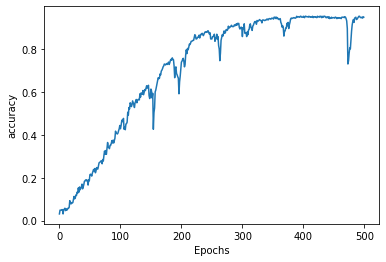

In [19]:
plot_graphs(history, 'accuracy')

In [26]:
seed_text = "Laurence went to dublin"
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

# as far as go, the probability goes down

# 'together at lanigans ball' exist

Laurence went to dublin lanigans ball ball ball as a jig hearty minute both
